In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [82]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [83]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [84]:
df.duplicated().sum()

0

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [86]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [87]:
df.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
Target         0.977763
dtype: float64

In [88]:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])
y = df['Target']

In [89]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
model1=LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred)

print("Model LinearRegression\n", '\nMSE', mse_1, '\nMAE', mae_1, '\nR²', r2_1)

Model LinearRegression
 
MSE 0.5558915986952442 
MAE 0.5332001304956565 
R² 0.7289407597956462


In [91]:
model2=DecisionTreeRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Model DecisionTreeRegressor\n", '\nMSE', mse_2, '\nMAE', mae_2, '\nR²', r2_2)

Model DecisionTreeRegressor
 
MSE 0.5077333482552082 
MAE 0.456209968507752 
R² 0.6125382558529229


In [92]:
model3=RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
mse_3 = mean_squared_error(y_test, y_pred3)
mae_3 = mean_absolute_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Model RandomForestRegressor\n", '\nMSE', mse_3, '\nMAE', mae_3, '\nR²', r2_3)

Model RandomForestRegressor
 
MSE 0.25387686390293007 
MAE 0.32599901320251956 
R² 0.8062613518996674


In [93]:
model4=GradientBoostingRegressor()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
mse_4 = mean_squared_error(y_test, y_pred4)
mae_4 = mean_absolute_error(y_test, y_pred4)
r2_4= r2_score(y_test, y_pred4)

print("Model GradientBoostingRegressor\n", '\nMSE', mse_4, '\nMAE', mae_4, '\nR²', r2_4)

Model GradientBoostingRegressor
 
MSE 0.29399901242474274 
MAE 0.37165044848436773 
R² 0.7756433164710084


In [94]:
model5=SVR()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
mse_5 = mean_squared_error(y_test, y_pred5)
mae_5 = mean_absolute_error(y_test, y_pred5)
r2_5 = r2_score(y_test, y_pred5)

print("Model SVR\n", '\nMSE', mse_5, '\nMAE', mae_5, '\nR²', r2_5)

Model SVR
 
MSE 0.3551984619989419 
MAE 0.3977630963437859 
R² 0.7289407597956462


In [118]:
print("\nModel LinearRegression\n", '\nMSE', mse_1, '\nMAE', mae_1, '\nR²', r2_1)
print("\nModel DecisionTreeRegressor\n", '\nMSE', mse_2, '\nMAE', mae_2, '\nR²', r2_2)
print("\nModel RandomForestRegressor\n", '\nMSE', mse_3, '\nMAE', mae_3, '\nR²', r2_3)
print("\nModel GradientBoostingRegressor\n", '\nMSE', mse_4, '\nMAE', mae_4, '\nR²', r2_4)
print("\nModel SVR\n", '\nMSE', mse_5, '\nMAE', mae_5, '\nR²', r2_5)


Model LinearRegression
 
MSE 0.5558915986952442 
MAE 0.5332001304956565 
R² 0.7289407597956462

Model DecisionTreeRegressor
 
MSE 0.5077333482552082 
MAE 0.456209968507752 
R² 0.6125382558529229

Model RandomForestRegressor
 
MSE 0.25387686390293007 
MAE 0.32599901320251956 
R² 0.8062613518996674

Model GradientBoostingRegressor
 
MSE 0.29399901242474274 
MAE 0.37165044848436773 
R² 0.7756433164710084

Model SVR
 
MSE 0.3551984619989419 
MAE 0.3977630963437859 
R² 0.7289407597956462


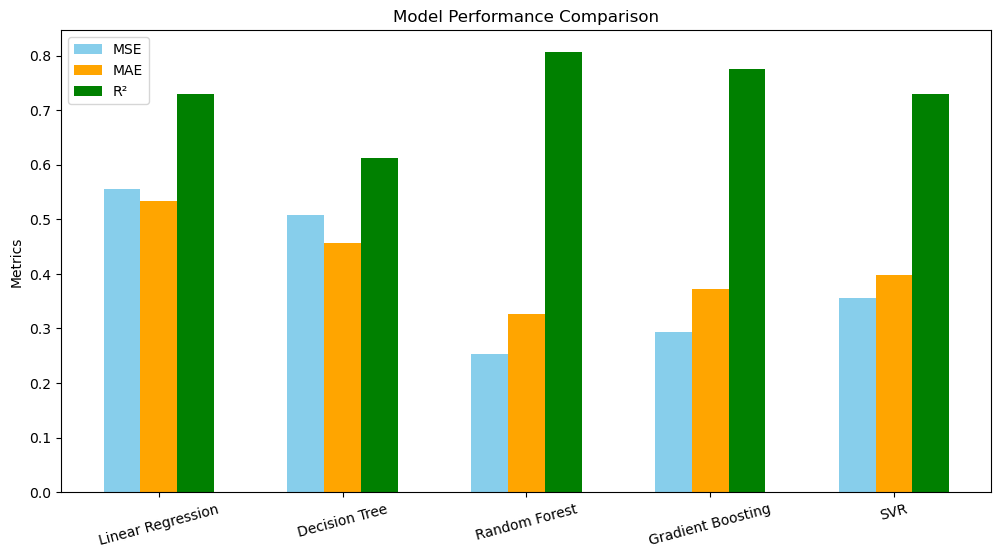

In [124]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
mse = [mse_1, mse_2, mse_3, mse_4, mse_5]
mae = [mae_1,mae_2,mae_3,mae_4, mae_5]
r2 = [r2_1,r2_2,r2_3,r2_4,  r2_5]

x = np.arange(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, mse, width=0.2, label='MSE', color='skyblue')
plt.bar(x, mae, width=0.2, label='MAE', color='orange')
plt.bar(x + 0.2, r2, width=0.2, label='R²', color='green')
plt.xticks(x, models, rotation=15)
plt.ylabel('Metrics')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()